In [1]:
import psycopg2
import pickle
import os
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np

import jetons
import liens

%matplotlib inline

## Un exemple

In [ ]:
contenu_brut = jetons.charge_contenu_article('JORFARTI000017765080')
position_mots, contenu_mots = jetons.transformation_jetons(contenu_brut)
jetons.joli_affichage(contenu_brut, position_mots, contenu_mots)

In [ ]:
liste_liens = liens.trouve_liens(contenu_brut, position_mots, contenu_mots)
liens.joli_affichage_liens(contenu_brut, liste_liens)

## Des exemples

In [ ]:
connection = psycopg2.connect(dbname='loi', user='loi', password='baba')
curseur = connection.cursor()

curseur.execute("select id_ from article_2 limit 100;")
liste_id_ = curseur.fetchall()

curseur.close()
connection.close()

In [ ]:
liste_contenu_brut = []
liste_position_mots = []
liste_contenu_mots = []
liste_liens_par_article = []
for id_, in liste_id_:
    contenu_brut = jetons.charge_contenu_article(id_)
    position_mots, contenu_mots = jetons.transformation_jetons(contenu_brut)
    liste_liens = liens.trouve_liens(contenu_brut, position_mots, contenu_mots)
    
    liste_contenu_brut.append(contenu_brut)
    liste_position_mots.append(position_mots)
    liste_contenu_mots.append(contenu_mots)
    liste_liens_par_article.append(liste_liens)

In [ ]:
for i in range(len(liste_liens_par_article)):
    id_ = liste_id_[i][0]
    contenu_brut = liste_contenu_brut[i]
    position_mots = liste_position_mots[i]
    contenu_mots = liste_contenu_mots[i]
    liste_liens = liste_liens_par_article[i]
    
    print(id_)
    jetons.joli_affichage(contenu_brut, position_mots, contenu_mots)
    print('liens :')
    liens.joli_affichage_liens(contenu_brut, liste_liens)
    print('représentation liens :')
    print(liens.representation_liens(contenu_brut, liste_liens))
    print()

## Tous les liens candidats
```
cd /home/michel/loi/data
cat representation_lien/* > representation_lien.txt
```

In [2]:
dossier_data = '/home/michel/loi/data/'
with open(os.path.join(dossier_data, 'representation_lien.txt'), 'r') as f:
    tous_les_liens = f.read()

In [3]:
liste_repr_lien = tous_les_liens.split('\n')

In [4]:
len(liste_repr_lien)

9663626

In [5]:
compteur_repr = Counter(liste_repr_lien)

In [6]:
len(compteur_repr)

565759

In [11]:
compteur_repr.most_common(200)

[('__arabe __arabe', 441286),
 ('article __arabe', 333706),
 ('present arrete', 313645),
 ('article __num_longue', 298268),
 ('article __num_longue code', 212852),
 ('present decret', 158822),
 ('arrete __date', 95518),
 ('__lettre_min modifie dispositions suivantes', 78981),
 ('ndeg __arabe', 74858),
 ('__arabe __arabe __arabe __arabe __arabe', 71263),
 ('__lettre_maj modifie dispositions suivantes', 69421),
 ('__arabe , __arabe', 69276),
 ('__arabe __lettre_maj', 68574),
 ('__arabe __arabe __arabe', 62185),
 ('__lettre_maj __arabe', 55920),
 ('__ordinal_fr alinea', 55884),
 ('article __ordinal_fr', 53972),
 ('__arabe a __arabe', 49933),
 ('present article', 49097),
 ('__lettre_min absence ou __lettre_min', 49016),
 ('article __arabe_comp', 45947),
 ('__arabe ans __lettre_min', 42777),
 ('decret en conseil __lettre_min', 41795),
 ('article __arabe decret __date susvise', 39181),
 ('alinea precedent', 36817),
 ('__ordinal_fr alinea article __num_longue', 34129),
 ('section __arabe', 33

In [8]:
frequences = np.array(sorted(compteur_repr.values())[::-1])

In [9]:
cumul = np.cumsum(frequences)

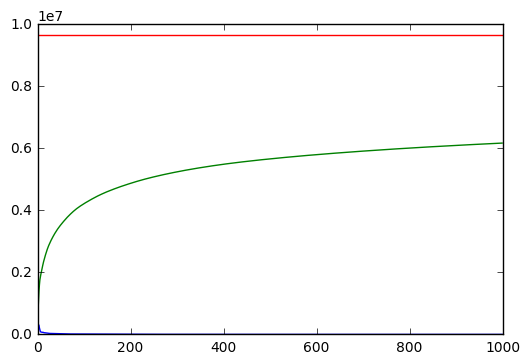

In [12]:
n = 1000
plt.plot(range(n), frequences[:n], range(n), cumul[:n], range(n), cumul[-1]*np.ones(n))

## Patrons de début

In [ ]:
patrons = {
    'article __arabe': {
        'num_article': 1,

    },
    'article __num_longue': {
        'num_article': 1,

    },
    'article __num_longue code': {
        'nature': 'code',
        'date': 1,
    },
    'arrete __date': {
        'nature': 'arrete',
        'date': 1,
    },
    'article __ordinal_fr': {
        'num_article': 1,
    },
    'article __arabe_comp': {
        'num_article': 1,
    },
    'article __arabe decret __date susvise': {
        'nature': 'decret',
        'num_article': 1,
        'date': 3
    },
    
}



    'article __arabe': {
    'article __num_longue': {
    'article __num_longue code': {
    'arrete __date': {
    'article __ordinal_fr': {
    'article __arabe_comp': {
    'article __arabe decret __date susvise': {
 ('__ordinal_fr alinea article __num_longue', 34129),
 ('articles __num_longue et __num_longue', 32620),
 ('decret ndeg __arabe_comp __date', 28831),
 ('article __arabe present arrete', 27625),
 ('decret __date susvise', 27142),
 ('articles __num_longue et __num_longue code', 24695),
 ('annexe __romain_maj', 23033),
 ('articles __arabe et __arabe', 21291),
 ('annexe present arrete', 20887),
 ('articles __num_longue a __num_longue', 20509),
 ('__ordinal_fr alinea article __arabe', 19196),
 ('article __arabe code', 19150),
 ('__ordinal_fr alinea article __num_longue code', 18653),
 ('__ordinal_o article __num_longue', 18254),
 ('article __num_longue meme code', 18014),
 ('annexe __lettre_maj', 17318),
 ('decret ndeg __arabe_comp __date relatif', 16894),
 ('arrete __date susvise', 16717),
 ('article __arabe loi __date susvisee', 16317),
 ('article __arabe decret ndeg __arabe_comp __date', 15698),
 ('article __arabe_comp code', 15153),
 ('loi ndeg __arabe_comp __date', 14548),
 ('ndeg __arabe_comp __date', 14133),
 ('article __arabe loi ndeg __arabe_comp __date', 13577),
 ('annexe __arabe', 13423),
 ('article __arabe arrete __date susvise', 13163),
 ('article __arabe present decret', 13074),
 ('arrete __date relatif', 13009),
 ('articles __num_longue a __num_longue code', 12917),
 ('annexe __romain_maj present arrete', 11272),
 ('decret __date', 10929),
 ('__ordinal_o __lettre_maj article __num_longue', 9456)
    
    
 ('decret en date __date', 9206),
 ('loi __date', 8990),
 ('article __arabe __lettre_maj', 8746),
 ('__romain_maj article __num_longue', 8636),
 ('avenant ndeg __arabe __date', 8573),
 ('decret ndeg __arabe_comp __date modifie', 8508),
 ('articles __arabe a __arabe', 8422),
 ('__date relatif', 8287),
 ('ndeg __arabe_comp', 8279),
 ('__ordinal_o article __num_longue code', 7915),
 ('__ordinal_o article __arabe', 7692),
 ('loi ndeg __arabe_comp __date relative', 7659),
 ('article __arabe loi __date', 7487),
 ('__lettre_maj article __num_longue', 7161),
 ('article __ordinal_fr present arrete', 7145),
 ('article __arabe reglement', 7080),
 ('articles __num_longue , __num_longue et __num_longue', 6907),
 ('article __ordinal_fr decret __date susvise', 6764),
 ('arrete __date modifie', 6693),
 ('__lettre_maj article __arabe', 6528),
 ('decret ndeg __arabe_comp __date modifie relatif', 6425),
 ('__arabe article __arabe', 6065),
 ('article __num_longue present code', 5827),
 ('__lettre_maj __arabe_comp', 5745),
 ('article __arabe decret ndeg __arabe_comp __date modifie', 5680),
 ('__romain_maj article __arabe', 5674),
 ('article __arabe meme decret', 5672),
 ('annexe __lettre_maj present arrete', 5612),
 ('no __arabe_comp en date __date', 5514),
 ('__romain_maj article __num_longue code', 5509),
 ('__ordinal_o l article __num_longue', 5329),
 ('article __arabe decret ndeg __arabe_comp __date relatif', 5068),
 ('article __arabe loi ndeg __arabe_comp __date relative', 4981),
 ('articles __num_longue et suivants code', 4977),
 ('article __arabe loi', 4923),

